# Material/Conteúdo de aula do dia 2

Responsável: Gustavo Nascimento/ Renato A. Corrêa dos Santos

* Importação de arquivos
* Biblioteca Pandas
* Séries e Dataframe
* Gráficos iniciais (Matplotlib)
* Exportação de arquivos e figuras


# Biblioteca pandas

A biblioteca Pandas utiliza NumPy, uma outra biblioteca de Python para cálculos numéricos, e facilita a análise de dados estruturas ou em forma de "tabela" (tabulados).

Diferente de NumPy, Pandas foi planejamento para trabalhar com dados tabulares ou heterogêneos.

## Importando bibliotecas em Python

In [ ]:
import pandas

In [5]:
import pandas as pd # Convenção

# Importação de arquivos

Vamos falar rapidamente sobre formas de ler arquivos em Python e em seguida vamos apresentar como comumente fazemos isso com a biblioteca Pandas.

## Leitura de arquivos em Python (sem Pandas)

Há algumas formas diferentes de importar arquivos no Google Colab. Uma das formas envolve selecionar a aba à esquerda ("Arquivos" ou "Files" e "Upload to Session Storage"). Nesta modalidade, os arquivos ficarão disponíveis apenas durante uma sessão de execução do Colab - se quiserem manter os arquivos permanentemente no Drive de vocês é importante criar uma pasta e carregá-lo FORA da sessão da atividade.

Nas atividades de hoje, vamos utilizar três formatos de arquivo diferente e que são comumente usados em análises científicas:

* CSV (comma-separated values, .csv)
* TSV (tab-separated values, .tsv)
* Arquivo do Excel (.xlsx)

In [ ]:
previsao_do_tempo_semana = open("Previsão do tempo.tsv", mode="r", encoding="utf-8")

In [ ]:
for linha in previsao_do_tempo_semana:
    print(linha) # Visualização dos dados separados por TAB

ValueError: I/O operation on closed file.

In [ ]:
previsao_do_tempo_semana.close() # Boa prática, para liberar recursos

Uma curiosidade é que os arquivos são lidos apenas uma vez. Ou seja, você só conseguirá realizar um laço for uma vez; se quiser realizar uma segunda iteração nas linhas do arquivo deverá importá-lo novamente.

In [ ]:
previsao_do_tempo_semana = open("Previsão do tempo.csv", mode="r", encoding="utf-8")

In [ ]:
for linha in previsao_do_tempo_semana:
    print(linha) # Visualização dos dados separados por vírgula

Geralmente, analisamos dados em tabelas do Excel ou Google Sheets (formato .xlsx). Existem funções já desenvolvidas para a leitura deste tipo de arquivo.

In [ ]:
previsao_do_tempo_semana = open("Previsão do tempo.xlsx", mode="r", encoding="utf-8")

In [ ]:
for linha in previsao_do_tempo_semana:
    print(linha)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcb in position 12: invalid continuation byte

Mais adiante vamos explorar também formas de escrever em arquivos.

Existem diferentes "modos" de abertura de arquivos (escrita, acrescentar informação em arquivo existente, escrita com verificação de existência de arquivos, etc).

## Leitura de arquivos com a biblioteca Pandas

# Series

Series são unidimensionais e compostos por:
* Array de valores do mesmo tipo
* Rótulos chamados índices

In [ ]:
pd.Series([10, 9, 9, 12, 13, 13, 14, 15]) # Números correspondem aos mínimos de temperatura (em Celsius) entre os dias 11 e 18 de junho de 2025 em São Paulo

,0
0,10
1,9
2,9
3,12
4,13
5,13
6,14
7,15


Da mesma forma que fizemos com strings e listas, podemos também associar este novo objeto a uma variável:

In [ ]:
temperaturas_minimas_sp = pd.Series([10, 9, 9, 12, 13, 13, 14, 15])

Acessando valores e índices associados:

In [ ]:
temperaturas_minimas_sp.array

<NumpyExtensionArray>
[np.int64(10),  np.int64(9),  np.int64(9), np.int64(12), np.int64(13),
 np.int64(13), np.int64(14), np.int64(15)]
Length: 8, dtype: int64

In [ ]:
temperaturas_minimas_sp.array.tolist()

[np.int64(10),
 np.int64(9),
 np.int64(9),
 np.int64(12),
 np.int64(13),
 np.int64(13),
 np.int64(14),
 np.int64(15)]

In [ ]:
temperaturas_minimas_sp.index

RangeIndex(start=0, stop=8, step=1)

In [ ]:
temperaturas_minimas_sp.index.tolist()

[0, 1, 2, 3, 4, 5, 6, 7]

Por padrão, os índices de Series são criados com números que têm início em zero. No entanto, eles podem ser numéricos ou cadeias de caracteres e nós mesmos podemos definir quais são esses índices.

Vamos associar cada um desses valores de temperatura em São Paulo (Celsius) às datas de previsão do tempo para as máximas:

In [ ]:
temperaturas_maximas_sp = pd.Series([15, 14, 17, 19, 19, 23, 24, 31], index=["11/06", "12/06", "13/06", "14/06", "15/06", "16/06", "17/06", "18/06"])

In [ ]:
temperaturas_maximas_sp.index

Index(['11/06', '12/06', '13/06', '14/06', '15/06', '16/06', '17/06', '18/06'], dtype='object')

Podemos acessar cada um dos valores usando os índices:

In [ ]:
temperaturas_maximas_sp['11/06']

np.int64(15)

In [ ]:
temperaturas_maximas_sp[['11/06', '12/06', '18/06']] # se tivermos dois valores, é necessário incluir uma lista de índices na consulta

,0
11/06,15
12/06,14
18/06,31


É possível alterar valores através de atribuição. Na verdade, a previsão de máxima para o dia 18 é de 24 C:

In [ ]:
temperaturas_maximas_sp['18/06'] = 24

In [ ]:
temperaturas_maximas_sp[['11/06', '12/06', '18/06']]

,0
11/06,15
12/06,14
18/06,24


## Extra: Definindo Series com o uso de dicionários

Pela nossa limitação de tempo, não foi possível mostrar dicionários, uma outra estrutura de dados bastante importante em Python. Vamos mostrar de forma breve.

Dicionários são combinações de chaves únicas e valores associados. Cada par é definido com "dois pontos" e é separado do próximo par por vírgulas:

In [ ]:
{'11/06': 15,
 '12/06': 14,
 '13/06': 17,
 '14/06': 19,
 '15/06': 19,
 '16/06': 23,
 '17/06': 24,
 '18/06': 24}

{'11/06': 15,
 '12/06': 14,
 '13/06': 17,
 '14/06': 19,
 '15/06': 19,
 '16/06': 23,
 '17/06': 24,
 '18/06': 24}

Podemos utilizá-lo para a construção de Series:

In [ ]:
pd.Series({'11/06': 15,
 '12/06': 14,
 '13/06': 17,
 '14/06': 19,
 '15/06': 19,
 '16/06': 23,
 '17/06': 24,
 '18/06': 24})

,0
11/06,15
12/06,14
13/06,17
14/06,19
15/06,19
16/06,23
17/06,24
18/06,24


## Operações matemáticas com Series

❌ seção incompleta. Não faz sentido ensinar operações com mínimas e máximas. Retomar aqui mais adiante, com outro exemplo.

## Alinhamentos de dados

❌ seção incompleta. Uma das grandes vantagens do uso de índices em Series é poder realizar operações entre objetos com os mesmos índices. Acho que vale a pena explorar um pouco disso antes de ir para DataFrames.

# DataFrames

DataFrames são representações de tabelas de dados e apresentam estas propriedades:
* Possuem uma coleção de colunas ordenadas e nomeadas
* Cada coluna apresenta dados do mesmo tipo

❌ seção incompleta. Explicar novamente o que são dicionários e como são estruturados.

Criando DataFrame com dicionários de listas:

In [28]:
temperaturas = {"Min": [10, 9, 9, 12, 13, 13, 14, 15],
                   "Max": [15, 14, 17, 19, 19, 23, 24, 31]}

In [29]:
temperaturas_df = pd.DataFrame(temperaturas)

Ao criar um dataframe desta forma, os índices são gerados automaticamente (numéricos, com início em zero) e os valores são adicionados na ordem em que aparecem nas listas.

In [30]:
temperaturas_df

,Min,Max
0,10,15
1,9,14
2,9,17
3,12,19
4,13,19
5,13,23
6,14,24
7,15,31


Como vimos em outros objetos de Python, DataFrames também apresentam métodos que podem ser aplicados:

In [31]:
temperaturas_df.head() # Visualizar as primeiras linhas

,Min,Max
0,10,15
1,9,14
2,9,17
3,12,19
4,13,19


In [32]:
temperaturas_df.tail() # Visualizar as últimas linhas

,Min,Max
3,12,19
4,13,19
5,13,23
6,14,24
7,15,31


Podemos acessar colunas desejadas do DataFrame:

In [33]:
temperaturas_df["Min"]

,Min
0,10
1,9
2,9
3,12
4,13
5,13
6,14
7,15


In [34]:
temperaturas_df.Min # Notação alternativa

,Min
0,10
1,9
2,9
3,12
4,13
5,13
6,14
7,15


In [35]:
temperaturas_df[["Min", "Max"]] # Similar à forma de recuperarmos informações de Series (naquele caso, com índices)

,Min,Max
0,10,15
1,9,14
2,9,17
3,12,19
4,13,19
5,13,23
6,14,24
7,15,31


❌ seção incompleta. Esclarecer bem as diferenças entre `.loc` e `.iloc`.

Podemos acessar linhas pelos valores e índices:

In [36]:
temperaturas_df.loc[1]

,1
Min,9
Max,14


In [37]:
temperaturas_df.iloc[1]

,1
Min,9
Max,14


Criando uma nova coluna:

In [38]:
temperaturas_df["Cidade"] = "São Paulo"

Todos os valores que queremos adicionar, neste caso, são iguais. Esse é um atalho para não fazer algo como uma lista assim:

In [39]:
temperaturas_df["Cidade"] = ["São Paulo", "São Paulo", "São Paulo", "São Paulo", "São Paulo", "São Paulo", "São Paulo", "São Paulo"]

In [40]:
temperaturas_df

,Min,Max,Cidade
0,10,15,São Paulo
1,9,14,São Paulo
2,9,17,São Paulo
3,12,19,São Paulo
4,13,19,São Paulo
5,13,23,São Paulo
6,14,24,São Paulo
7,15,31,São Paulo


Deletando colunas do DataFrame.

Como não faz muito sentido neste momento ter uma coluna com todos os dados iguais, vamos remover a coluna "Cidade":

In [41]:
del temperaturas_df["Cidade"]

In [42]:
temperaturas_df

,Min,Max
0,10,15
1,9,14
2,9,17
3,12,19
4,13,19
5,13,23
6,14,24
7,15,31


In [43]:
del temperaturas_df["Cidada"]

KeyError: 'Cidada'

## Erros frequentes em Python

❌ seção incompleta

O "traceback" do interpretador de Python nos ajuda a identificar, sempre que possível, a que está associado nosso erro:

* `SyntaxError`: o interpretador não reconhece determinado trecho como código válido de Python
* `NameError`:
* `IndexError`:
* `IndentationError`:
* `KeyError`: da mesma forma que temos erros ao tentar acessar um índice que não existe em lista, temos também erro ao tentar acessar chaves de dicionários ou nomes de colunas em DataFrames !

In [44]:
temperaturas_df

,Min,Max
0,10,15
1,9,14
2,9,17
3,12,19
4,13,19
5,13,23
6,14,24
7,15,31


Modificando valores de um DataFrame criado:

In [45]:
temperaturas_df["Max"] = [15, 14, 17, 19, 19, 23, 24, 24]

In [46]:
temperaturas_df

,Min,Max
0,10,15
1,9,14
2,9,17
3,12,19
4,13,19
5,13,23
6,14,24
7,15,24


## Gráficos iniciais (plotagem)

A biblioteca Matplotlib é uma das mais comuns para visualização de dados em Python de forma bidimensional.

In [47]:
import matplotlib.pyplot as plt

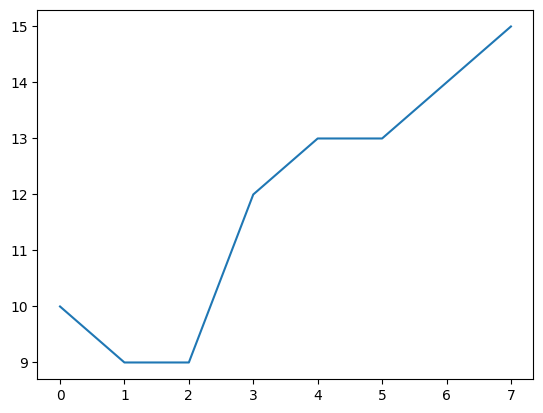

In [49]:
plt.plot(temperaturas_df["Min"])

Alterar o index pode deixar o gráfico também mais informativo (o uso de índices do DataFrame é uma das integrações entre pandas e matplotlib).

In [50]:
temperaturas_df.index = ["11/06", "12/06", "13/06", "14/06", "15/06", "16/06", "17/06", "18/06"]

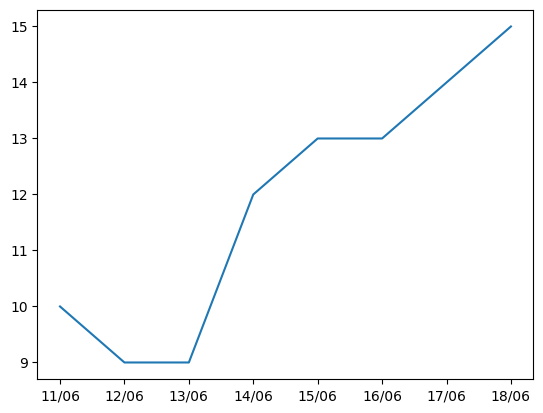

In [51]:
plt.plot(temperaturas_df["Min"])

O objeto Figure inclui uma ou mais plotagens:

In [54]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

Para adicionar plotagens em uma figura é necessário definir subplotagens:

In [57]:
ax1 = fig.add_subplot(2, 1, 1) # Define número de colunas e linhas, bem como a posição em que determinada subplotagem é incluída
ax2 = fig.add_subplot(2, 1, 2)

❌ seção incompleta. Como otimizar as dimensões e outros elementos da figura?

In [58]:
ax1.plot(temperaturas_df["Min"])

In [59]:
ax2.plot(temperaturas_df["Max"])

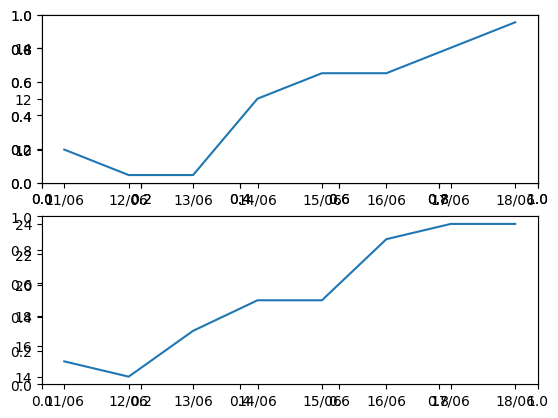

In [60]:
fig

Uma forma alternativa de criar a figura e as subplotagens é utilizando a função `subplots()`:

❌ seção incompleta. Quais otimizações feitas automaticamente pelo subplots, para permitir que as etiquetas dos eixos não se sobreponham ?

In [93]:
fig, axes = plt.subplots(nrows=2, ncols=1)

In [87]:
axes

array([<Axes: >, <Axes: >], dtype=object)

Após termos definido "axes", podemos atribuir valores para cada um de seus componentes:

In [88]:
axes[0].plot(temperaturas_df["Min"])
axes[1].plot(temperaturas_df["Max"])

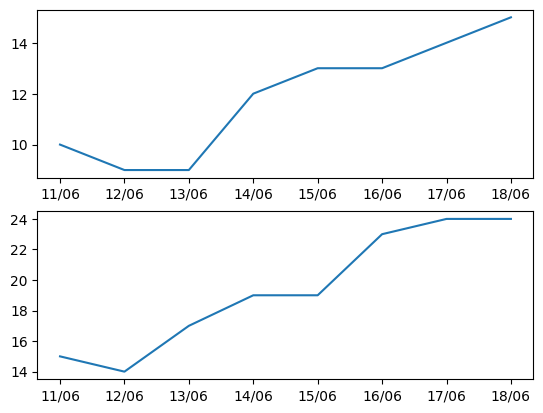

In [89]:
fig

Vamos definir cores nos nossos gráficos.

Como cientistas, também costumamos buscar escolher paletas de cores que se adequem aos nossos temas de pesquisa. Preferencialmente, devemos também buscar aquelas que sejam amigáveis a daltônicos.

❌ seção incompleta. Além de daltonismo, existem outras situações. Talvez falte uma explicação melhor aqui.

❌ seção incompleta. Falar um pouco sobre o sistema hexadecimal que é super popular hoje e dá para utilizar no matplotlib.

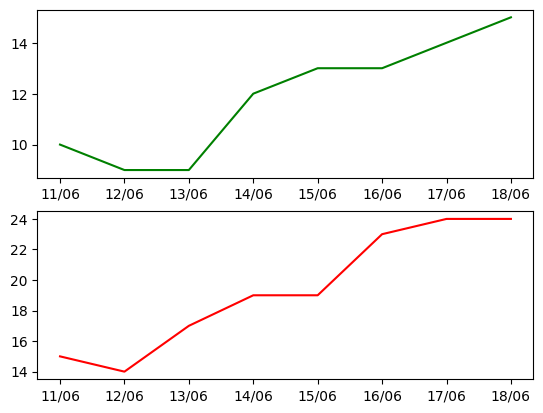

In [94]:
axes[0].plot(temperaturas_df["Min"], color="green")
axes[1].plot(temperaturas_df["Max"], color="red")

fig

Ressaltando pontos com dados:

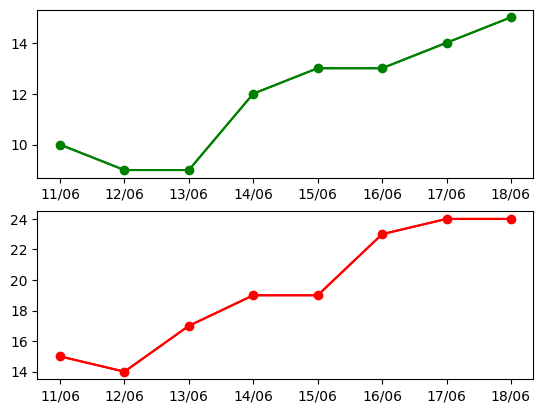

In [95]:
axes[0].plot(temperaturas_df["Min"], color="green", marker="o")
axes[1].plot(temperaturas_df["Max"], color="red", marker="o")

fig

Podemos criar uma figura com as duas temperaturas (mínima e máxima) na mesma plotagem usando o objeto Figure. O eixo x irá se alinhar, já que ambas as colunas do DataFrame estão associadas aos mesmos índices:

In [119]:
fig = plt.figure()

In [120]:
ax = fig.add_subplot(1, 1, 1)

In [121]:
ax.plot(temperaturas_df["Min"], color="green", marker="o")
ax.plot(temperaturas_df["Max"], color="red", marker="o")

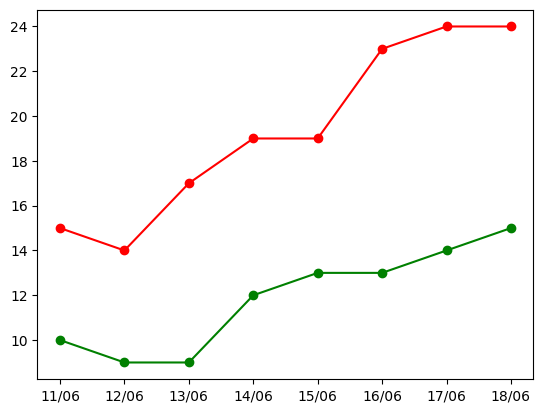

In [122]:
fig

Podemos adicionar legenda ao gráfico incluindo o argumento `label` nos nossos plots, bem como chamar o método `.legend()` no objeto:

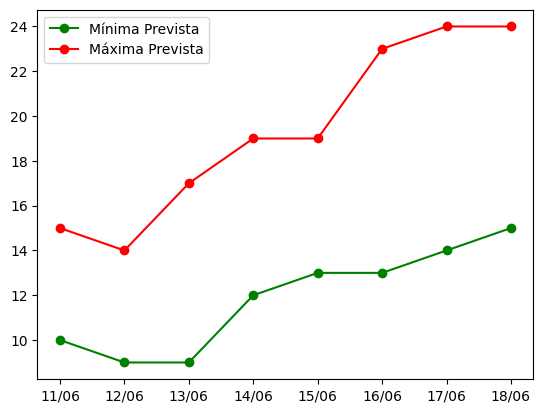

In [124]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(temperaturas_df["Min"], color="green", marker="o", label="Mínima Prevista")
ax.plot(temperaturas_df["Max"], color="red", marker="o", label="Máxima Prevista")
ax.legend()
fig

O argumento `loc` pode ser utilizado para alterar a posição da legenda (que por padrão é "upper left", ou seja, acima à esquerda).

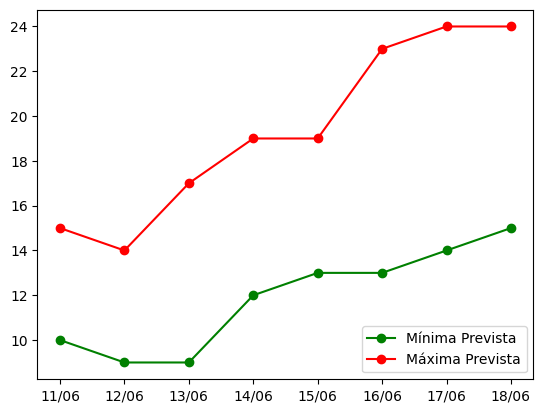

In [131]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(temperaturas_df["Min"], color="green", marker="o", label="Mínima Prevista")
ax.plot(temperaturas_df["Max"], color="red", marker="o", label="Máxima Prevista")
ax.legend(loc="lower right")
fig

Podemos adicionar títulos e nomes aos eixos X e Y da plotagem:

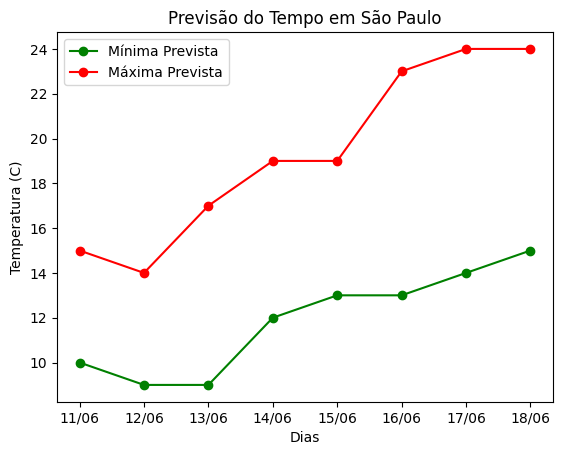

In [130]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(temperaturas_df["Min"], color="green", marker="o", label="Mínima Prevista")
ax.plot(temperaturas_df["Max"], color="red", marker="o", label="Máxima Prevista")
ax.legend()
ax.set_title("Previsão do Tempo em São Paulo")
ax.set_xlabel("Dias")
ax.set_ylabel("Temperatura (C)")
fig

Incluindo plotagens com distribuição de temperaturas mínimas e máximas na mesma figura:

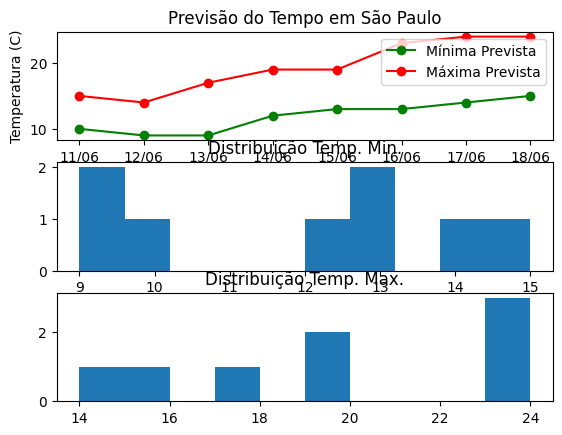

In [133]:
fig = plt.figure()

ax1 = fig.add_subplot(3, 1, 1)
ax1.plot(temperaturas_df["Min"], color="green", marker="o", label="Mínima Prevista")
ax1.plot(temperaturas_df["Max"], color="red", marker="o", label="Máxima Prevista")
ax1.legend()
ax1.set_title("Previsão do Tempo em São Paulo")
ax1.set_xlabel("Dias")
ax1.set_ylabel("Temperatura (C)")

ax2 = fig.add_subplot(3, 1, 2)
ax2.hist(temperaturas_df["Min"])
ax2.set_title("Distribuição Temp. Min.")

ax3 = fig.add_subplot(3, 1, 3)
ax3.hist(temperaturas_df["Max"])
ax3.set_title("Distribuição Temp. Max.")

fig

Salvando uma figura em imagem:

In [135]:
fig.savefig("previsao_do_tempo_sp.png") # No Google Colab, a figura irá aparecer na mesma área em que colocamos os arquivos txt/csv/tsv/excel

É possível alterar a resolução da imagem

In [136]:
fig.savefig("previsao_do_tempo_sp.png", dpi=200)

É possível alterar o tipo de arquivo no qual a imagem ficará salva (PDF, PNG, entre outros):

In [137]:
fig.savefig("previsao_do_tempo_sp.pdf", dpi=200)

Usando a opção `format="png"`, é possível definir explicitamente o formato do arquivo a ser gerado. Mesmo que o nome do arquivo tenha a extensão `.pdf`, matplotlib irá forçar a geração de uma imagem em formato PNG.

In [138]:
fig.savefig("previsao_do_tempo_sp.pdf", dpi=200, format="png")

❌ seção incompleta. Falar um pouco sobre como alterar as dimensões das imagens geradas e eventuais conflitos com as dimensões definidas na(s) plotagem(ns) e figura.

# Exportação de arquivos e figuras

# Referências

* McKinney, Wes. Python para análise de dados: Tratamento de dados com Pandas, NumPy e IPython. Novatec Editora, 2018.